In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
# set parameters:
max_features = 5000
maxlen = 13772
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 3

Using TensorFlow backend.


In [0]:
import pandas as pd
df = pd.read_csv('dataset.csv',sep='\t', lineterminator='\r')
df = df.replace('\n','', regex=True)
df = df.replace("'","", regex =True)
## Hapus dataset yang netral, hanya mengambil dataset positif dan negatif
df = df[df.sentimen != '0']
## Ubah label positif menjadi 1, label negatif menjadi 0
df['sentimen'] = df['sentimen'].map({'-1':0,'1':1})

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
x_dataset = vectorizer.fit_transform(df['Tweet'].values.astype('U')).toarray()
y_dataset = df['sentimen']

## Training dan testing
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=42)

    

Build model...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4384 samples, validate on 1096 samples
Epoch 1/3
4384/4384 [==============================] - 340s 78ms/step - loss: nan - accuracy: 0.5224 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/3
4384/4384 [==============================] - 344s 78ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/3
4384/4384 [==============================] - 340s 78ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


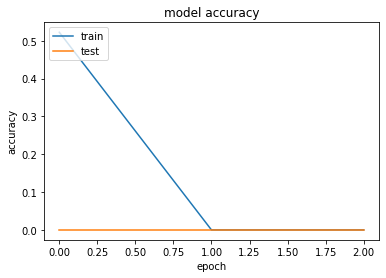

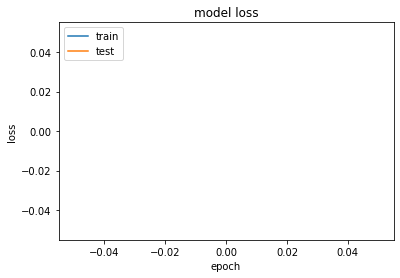

In [3]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()